# Predicting Breast Cancer 
## Part 2 : KNN Classification
### 1. Load Modules

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
import sys, os
import pandas as pd
import helper_functions as hf
from helper_functions import training_set, class_set, test_set, test_class_set
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.model_selection import KFold, cross_val_score # Cross validation
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating Area Under Curve for ROC's!
from sklearn.externals import joblib

pd.set_option('display.max_columns', 500) 
# Included to show all the columns 
# since it is a fairly large data set

plt.style.use('ggplot') # Using ggplot2 style visuals 

### 2. Loading Data

In [2]:
breast_cancer = hf.breast_cancer

In [3]:
# dimensions of our data frame
breast_cancer.shape

(569, 31)

In [4]:
# data types of our columns 
breast_cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

### 3. Fitting model

In [5]:
fit_knn = KNeighborsClassifier(n_neighbors=3)

# Training model
fit_knn.fit(training_set, class_set['diagnosis'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
# Since KNN was first algorithm I included training set metrics
# to give context  
# We predict the class for our training set

predictionsTrain = fit_knn.predict(training_set) 

In [7]:
# Measure the accuracy based on the training set
accuracy_train = fit_knn.score(training_set, 
                               class_set['diagnosis'])

train_error_rate = 1 - accuracy_train  

In [8]:
# First we predict the Dx for the test set and call it predictions
predictions = fit_knn.predict(test_set)	

In [9]:
# Let's get the accuracy of our test set
accuracy = fit_knn.score(test_set, 
                         test_class_set['diagnosis'])

test_error_rate = 1 - accuracy

In [10]:
#ROC Curve and AUC Calculations
fpr, tpr, _ = roc_curve(predictions, test_class_set)

auc_knn = auc(fpr, tpr)

FITTING MODEL KNN USING k=3
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Optimal K
Optimal K is 3
TRAINING SET CALCULATIONS
Actual Values       0    1
Predicted Values          
0                 281   18
1                   5  151
Here is our accuracy for our training set:
  0.949
The train error rate for our model is:
  0.051
CROSS VALIDATION
Accuracy:  0.925 (+/-  0.025)
TEST SET CALCULATIONS
Actual Values      0   1
Predicted Values        
0                 68   5
1                  3  38
Here is our accuracy for our test set:
  0.930
The test error rate for our model is:
  0.070


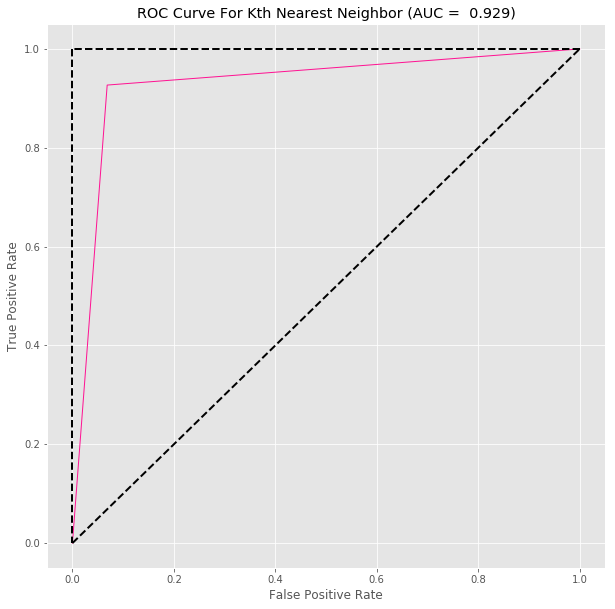

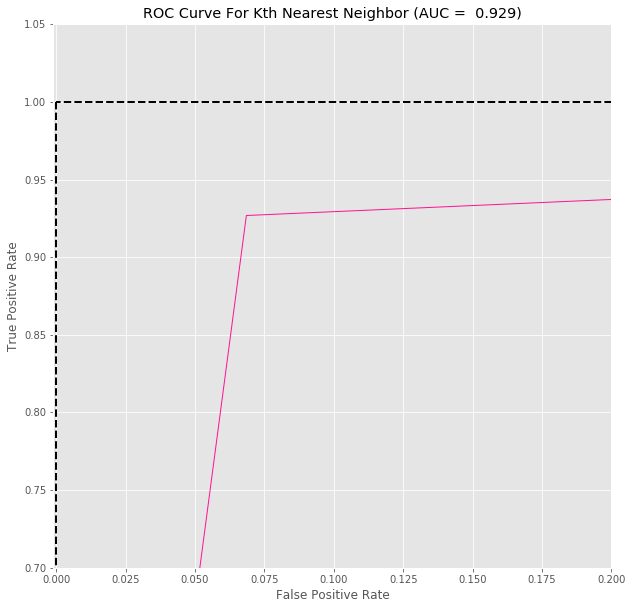

In [11]:
if __name__ == '__main__':
    print('FITTING MODEL KNN USING k=3')
    print(fit_knn)
    
    print('Optimal K')
    myKs = []
    for i in range(0, 50):
        if (i % 2 != 0):
            myKs.append(i)

    cross_vals = []
    for k in myKs:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn,
                                 training_set, 
                                 class_set['diagnosis'], 
                                 cv = 10, 
                                 scoring='accuracy')
        cross_vals.append(scores.mean())
        
    MSE = [1 - x for x in cross_vals]
    optimal_k = myKs[MSE.index(min(MSE))]
    print("Optimal K is {0}".format(optimal_k))

    print('TRAINING SET CALCULATIONS')
    # Here we create a matrix comparing the actual values 
    # vs. the predicted values
    
    print(pd.crosstab(predictionsTrain, 
                      class_set['diagnosis'], 
                      rownames=['Predicted Values'], 
                      colnames=['Actual Values']))

    print("Here is our accuracy for our training set:\n {0: .3f}"
          .format(accuracy_train))
    
    print("The train error rate for our model is:\n {0: .3f}"
          .format(train_error_rate))

    print('CROSS VALIDATION')
    hf.cross_val_metrics(fit_knn, training_set, 
                         class_set['diagnosis'], 
                         print_results = True)

    print('TEST SET CALCULATIONS')
    # Let's compare the predictions vs. the actual values
    print(pd.crosstab(predictions, 
                      test_class_set['diagnosis'], 
                      rownames=['Predicted Values'], 
                      colnames=['Actual Values']))

    # TEST ERROR RATE!!
    print("Here is our accuracy for our test set:\n {0: .3f}"
          .format(accuracy))

    # Here we calculate the test error rate!
    print("The test error rate for our model is:\n {0: .3f}"
          .format(test_error_rate))

    # ROC Curve
    hf.plot_roc_curve(fpr, tpr, auc_knn, 'knn')

    # Zoomed in ROC Curve
    hf.plot_roc_curve(fpr, tpr, auc_knn, 'knn',
                      (-0.001, 0.2), (0.7, 1.05))
else:
    def return_knn():
        '''
        Function to output values created in script 
        '''
        return fpr, tpr, auc_knn, predictions, test_error_rate

    mean_cv_knn, std_error_knn = hf.cross_val_metrics(fit_knn, 
                                                      training_set, 
                                                      class_set['diagnosis'],
                                                      print_results = False)